In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen
import pandas as pd

In [53]:
df = pd.read_csv('./data/longitude_latitude_data.csv', index_col=[0])
df.head()
mean_longitude = df['Longitude'].mean()
mean_latitude = df['Latitude'].mean()
df['Sale_Price'] = pd.to_numeric(df['Sale_Price'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

# Now, group by 'Neighborhood' and calculate mean for numeric columns
grouped = df.groupby('Neighborhood', as_index=False)[['Longitude', 'Latitude', 'Sale_Price']].mean()

mean_longitude, mean_latitude


(-93.64289689856655, 42.03448223395904)

In [54]:
def plot_with_extent(grouped, extent, title):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    scatter = ax.scatter(grouped['Longitude'], grouped['Latitude'], s=100,
                         c=grouped['Sale_Price'], cmap='viridis', edgecolor='k', 
                         transform=ccrs.Geodetic())
    plt.colorbar(scatter, ax=ax, shrink=0.5, label='Average Sale Price')
    ax.set_title(title)
    plt.show()

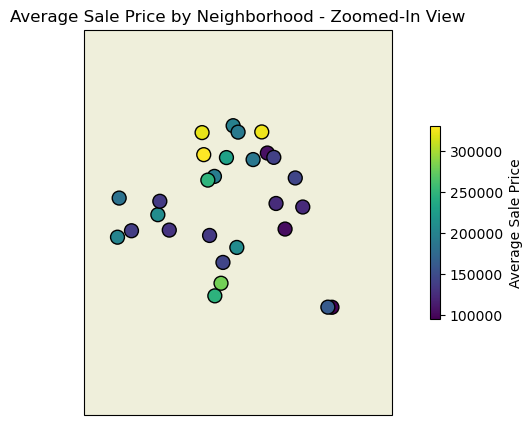

In [55]:
# Full State and Surrounding States View
plot_with_extent(grouped, [-93.7, -93.58, 41.95, 42.1], 'Average Sale Price by Neighborhood - Zoomed-In View')

In [58]:
# Create a map centered around the mean location of all points
map_center = [grouped['Latitude'].mean(), grouped['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12, tiles='OpenStreetMap')

# Define a function to determine marker colors based on sale price
def get_color(sale_price):
    if sale_price < 100000:
        return 'blue'
    elif 100000 <= sale_price < 140000:
        return 'cyan'
    elif 140000 <= sale_price < 180000:
        return 'green'
    elif 180000 <= sale_price < 220000:
        return 'yellow'
    elif 220000 <= sale_price < 260000:
        return 'orange'
    elif 260000 <= sale_price < 300000:
        return 'red'
    else:
        return 'purple'


# Add markers for each neighborhood
for _, row in grouped.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=get_color(row['Sale_Price']),
        fill=True,
        fill_color=get_color(row['Sale_Price']),
        fill_opacity=0.7,
        popup=f"Neighborhood: {row['Neighborhood']}<br>Sale Price: ${row['Sale_Price']:.2f}"
    ).add_to(m)

# Display the map in Jupyter Notebook or JupyterLab
m